# 2.数据概览(Data Glimpse)                             


**笨办法学 Python 数据分析  / learn data analysis the hard way**
- @Author：知行并重


|<h2>技能点</h2> | |
|:-----|:-----|
| **Q019 预览数据表的前n行数据**| **Q020 预览数据表的后n行数据**|
| **Q021 随机抽取数据表的n行数据**||
| **Q022 查看数据表的行数和列数**|
| **Q023 提取数据表的索引**| **Q024 提取数据表的列名**|
| **Q025 提取数据表的数据部分**||
| **Q026 查看数据表的描述统计（均值、方差、中位数）**| **Q027 查看数据表的各列的数据类型**|
| **Q028 查看数据所占内存空间大小(三种方法)**||


**导入必要的库**

In [1]:
import pandas as pd # 数据分析
import numpy as np # 矩阵计算

**数据读取**

In [2]:
data = pd.read_csv("../input/titanic.csv")

|字段名|含义|字段类型|取值类型|
|:---|:---|:---|:---|
|PassengerId|乘客ID|离散型|int|
|Survived|**是否幸存（幸存：1 遇难：0）**|离散型|int|
|Pclass|客舱等级（1：一等舱 2：二等舱 3：三等舱）|离散型|int|
|Name|姓名|离散型|str|
|Sex|性别|离散型|str|
|Age|年龄|连续型|int|
|SibSp|在船兄弟姐妹/配偶数|连续型|int|
|Parch|在船父母/子女数|连续型|int|
|Ticket|船票编号|离散型|str|
|Fare|票价|连续型|float|
|Cabin|客舱号|离散型|str|
|Embarked|登船港口|离散型|str|

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 数据观察

拿到一个数据后，我们需要先对数据有个初步的认识，就像看到一个陌生人，我们先上下打量一下。

此外，每列的大概取值，类型等都是感兴趣的方面。

对于连续的列可以看看最值，均值等统计指标。离散的变量可以看看频数分布等等。

### Q019 预览数据表的前n行数据

例如查看数据前3行 

In [4]:
data.head(3)  # 不加参数3 默认前5行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Q020 预览数据表的后n行数据 

例如：查看数据后10行 

In [6]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Q021 随机抽取数据表的n行数据

In [8]:
#　随机抽取　５行数据
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q


### Q022 查看数据表的行数和列数

In [10]:
data.shape

(891, 12)

提取数据表 列数

上面的结果是一个元祖，我们可以通过下标索引提取对应信息，（Python的索引从0开始）所以第一维`data.shape[0]` 对应的是行数。

In [11]:
data.shape[1]

12

### Q023 提取数据表的索引

In [12]:
data.index

RangeIndex(start=0, stop=891, step=1)

### Q024 提取数据表的列名

In [14]:
# data.columns
data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### Q025 提取数据表的数据部分
用`data.values`,其结果是 numpy的array 格式

In [15]:
data.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

### Q026 查看数据表的描述统计（均值、方差、中位数）

使用`describe()`方法,例如查看 'Age','Fare','Pclass'三个字段的 描述统计,并赋给变量 des_data

In [16]:
# data.describe() 
des_data = data[['Age','Fare','Pclass']].describe()
des_data

,Age,Fare,Pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


将des_data转置,并借助numpy `round函数`设置显示2位小数点

In [17]:
np.round(des_data,2) 

,Age,Fare,Pclass
count,714.00,891.00,891.00
mean,29.70,32.20,2.31
std,14.53,49.69,0.84
min,0.42,0.00,1.00
25%,20.12,7.91,2.00
50%,28.00,14.45,3.00
75%,38.00,31.00,3.00
max,80.00,512.33,3.00


### 3.9 数据可视化

其实,对于数据的前期探索,除了上面的描述统计(均值\中位数\方差\计数等)外, **可视化**也是一个常用且有效的方法.
这里我们先简单介绍两个pandas 中常用的绘图函数,大家现有个简单的印象. 更详细的绘图方法我们将在后面的 Visualization 部分具体介绍.

In [18]:
import matplotlib.pyplot as plt  # 导入绘图工具包
# 设置 matplotlib 绘图在jupyter 内显示
%matplotlib inline       

#### 3.9.1 查看单变量的分布 
##### 3.9.1.1 连续变量 年龄 Age 的分布

In [22]:
pd.Series.plot??
pd.DataFrame??

<AxesSubplot:ylabel='Frequency'>

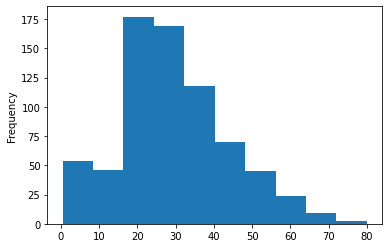

In [19]:
data['Age'].plot(kind='hist')

##### 3.9.1.2 离散变量 港口 Embarked 的分布

S    644
C    168
Q     77
Name: Embarked, dtype: int64

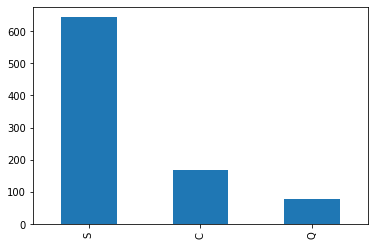

In [20]:
# 首先进行 频数 统计
result = data['Embarked'].value_counts()
result.plot(kind='bar')
result

#### 3.9.2 查看多变量的分布
由于现在不是专门讲解可视化的章节, 更详细内容我们放在第 8 章

### Q027 查看数据表的各列的数据类型
常见的三种类型  'float','int','object' -> object 是指有字符串或包含混合数据类型的情况  

In [23]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

1.info 方法

In [25]:
# data.info()
# 其他参数
# data.info()  
data.info(memory_usage = 'deep')   # 83.7+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 318.5 KB


### Q028 查看数据所占内存空间大小(三种方法)

上面 `info()` 是第一种方法。

**2.memory_usage方法**

仅 pandas 中对于 Series 和 DataFrame 对象提供的方法。

In [28]:
data.memory_usage(deep = True).sum()

326160

3.sys 方法

In [29]:
import sys
sys.getsizeof(data) 

326184

In [30]:
# # 查看列表占用大小
ls = data['PassengerId'].tolist()
print('type:',type(ls))
print('size:{} kb'.format(sys.getsizeof(ls)/1024))

type: <class 'list'>
size:7.0234375 kb


In [33]:
# ls.memory_usage()

# 谢谢观看
Github 代码：https://github.com/kevin-meng/learn-data-analysis-the-hard-way

![](../pics/thankyou.png)
